In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Inspections of restaurants
scores_known = pd.read_csv('data/facility_scores_known.csv')
scores_known.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,...,Non-inspection site visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
scores_known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43199 entries, 0 to 43198
Data columns (total 23 columns):
business_id                  43199 non-null int64
business_name                43199 non-null object
business_address             43199 non-null object
business_city                43199 non-null object
business_state               43199 non-null object
business_postal_code         42245 non-null object
business_latitude            22015 non-null float64
business_longitude           22015 non-null float64
business_location            22015 non-null object
business_phone_number        14144 non-null float64
inspection_id                43199 non-null object
inspection_date              43199 non-null object
inspection_score             31650 non-null float64
inspection_type              43199 non-null object
violation_id                 32218 non-null object
violation_description        32218 non-null object
risk_category                32218 non-null object
Neighborhoods (old)  

/Users/kei/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/kei/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/kei/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/kei/anaconda3/lib/python3.7/site-package

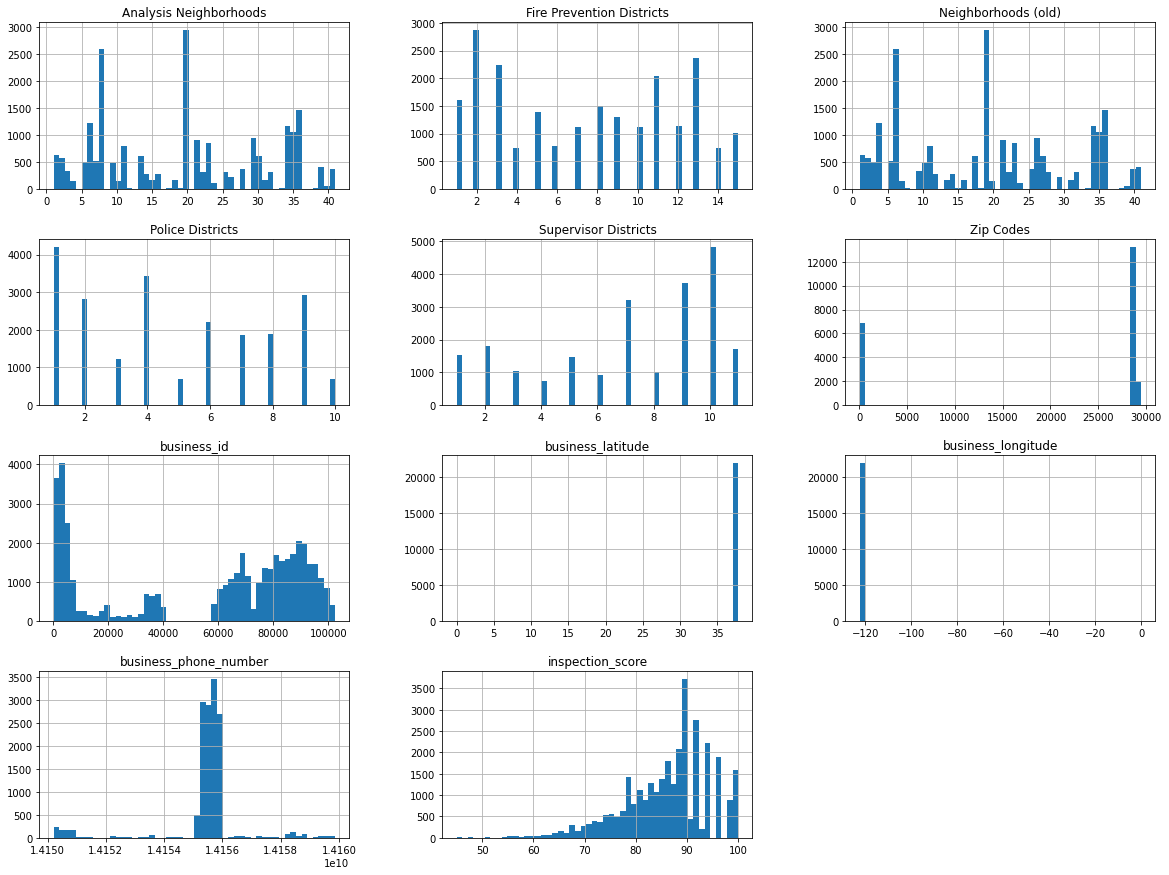

In [9]:
# Histogram
scores_known.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# Scatter matrix 
from pandas.plotting import scatter_matrix
# scatter_matrix(scores_known, figsize=(24, 16))

In [11]:
# Drop rows that have no inspection score. 
score_cleaned = scores_known.dropna(subset=['inspection_score'])
# Narrow down the columns. 
score_cleaned = score_cleaned[['business_name', 'business_address', 'violation_description', 'risk_category', 
                               'business_postal_code', 'business_latitude', 'business_longitude', 
                               'inspection_type', 'inspection_score', 
                              'Neighborhoods (old)', 'Police Districts', 'Supervisor Districts', 
                               'Fire Prevention Districts', 'Zip Codes', 'Analysis Neighborhoods']]
score_cleaned.head()

,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_type,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
1,BREADBELLY,1408 Clement St,Inadequately cleaned or sanitized food contact...,Moderate Risk,94118,NaN,NaN,Routine - Unscheduled,96.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Hakkasan San Francisco,1 Kearny St,Inadequate and inaccessible handwashing facili...,Moderate Risk,94108,NaN,NaN,Routine - Unscheduled,88.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Tselogs,552 Jones St,Improper thawing methods,Moderate Risk,94102,NaN,NaN,Routine - Unscheduled,94.0,NaN,NaN,NaN,NaN,NaN,NaN
7,"The Estate Kitchen, LLC",799 Bryant St,Improper food storage,Low Risk,94107,NaN,NaN,Routine - Unscheduled,86.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Beloved Cafe,3338 24th St,Low risk vermin infestation,Low Risk,94110,NaN,NaN,Routine - Unscheduled,96.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
score_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31650 entries, 1 to 43198
Data columns (total 15 columns):
business_name                31650 non-null object
business_address             31650 non-null object
violation_description        30010 non-null object
risk_category                30010 non-null object
business_postal_code         30983 non-null object
business_latitude            17259 non-null float64
business_longitude           17259 non-null float64
inspection_type              31650 non-null object
inspection_score             31650 non-null float64
Neighborhoods (old)          17250 non-null float64
Police Districts             17250 non-null float64
Supervisor Districts         17250 non-null float64
Fire Prevention Districts    17220 non-null float64
Zip Codes                    17256 non-null float64
Analysis Neighborhoods       17250 non-null float64
dtypes: float64(9), object(6)
memory usage: 3.9+ MB


In [13]:
# Check the violation_description values. 
ret = score_cleaned['violation_description'].value_counts()
print(len(ret))
ret

65


Unclean or degraded floors walls or ceilings                    2596
Unapproved or unmaintained equipment or utensils                2146
Inadequately cleaned or sanitized food contact surfaces         2103
Inadequate and inaccessible handwashing facilities              2066
Moderate risk food holding temperature                          1945
                                                                ... 
Improper cooking time or temperatures                              4
Discharge from employee nose mouth or eye                          4
Noncompliance with Gulf Coast oyster regulation                    3
Improperly displayed mobile food permit or signage                 3
No restroom facility within 200 feet of mobile food facility       1
Name: violation_description, Length: 65, dtype: int64

In [14]:
score_cleaned['violation_description'].unique()

array(['Inadequately cleaned or sanitized food contact surfaces',
       'Inadequate and inaccessible handwashing facilities',
       'Improper thawing methods', 'Improper food storage',
       'Low risk vermin infestation', nan,
       'Improper or defective plumbing',
       'Food safety certificate or food handler card not available',
       'Moderate risk food holding temperature',
       'Wiping cloths not clean or properly stored or inadequate sanitizer',
       'Unapproved or unmaintained equipment or utensils',
       'High risk food holding temperature',
       'Unclean or degraded floors walls or ceilings',
       'High risk vermin infestation', 'Moderate risk vermin infestation',
       'Unclean nonfood contact surfaces',
       'Noncompliance with shell fish tags or display',
       'Insufficient hot water or running water',
       'Mobile food facility with unapproved operating conditions',
       'Unclean or unsanitary food contact surfaces',
       'Foods not protected f

In [15]:
# Check the risk_category values. 
ret = score_cleaned['risk_category'].value_counts()
print(len(ret))
ret

3


Low Risk         14307
Moderate Risk    11448
High Risk         4255
Name: risk_category, dtype: int64

In [16]:
# Count of NaN in risk_category
score_cleaned['risk_category'].isnull().sum()

1640

In [17]:
# Check postal codes. 
ret = score_cleaned['business_postal_code'].value_counts()
print(len(ret))
ret

53


94110         3602
94103         2719
94109         2168
94102         2112
94133         1979
94118         1678
94107         1632
94112         1356
94122         1303
94108         1287
94105         1265
94121         1165
94115         1137
94111         1021
94114          895
94124          858
94117          747
94123          732
94104          702
94132          625
94134          574
94116          514
94127          343
94131          321
94158          108
94130           25
94101           22
94143            7
94301            7
Ca               7
94013            7
941              7
94080            6
92672            6
94901            5
941102019        5
94120            4
CA               4
64110            4
941033148        3
95112            2
94117-3504       2
0                2
94602            2
95105            2
94124-1917       2
94544            2
94188            2
95117            1
94122-1909       1
95132            1
95133            1
94129       

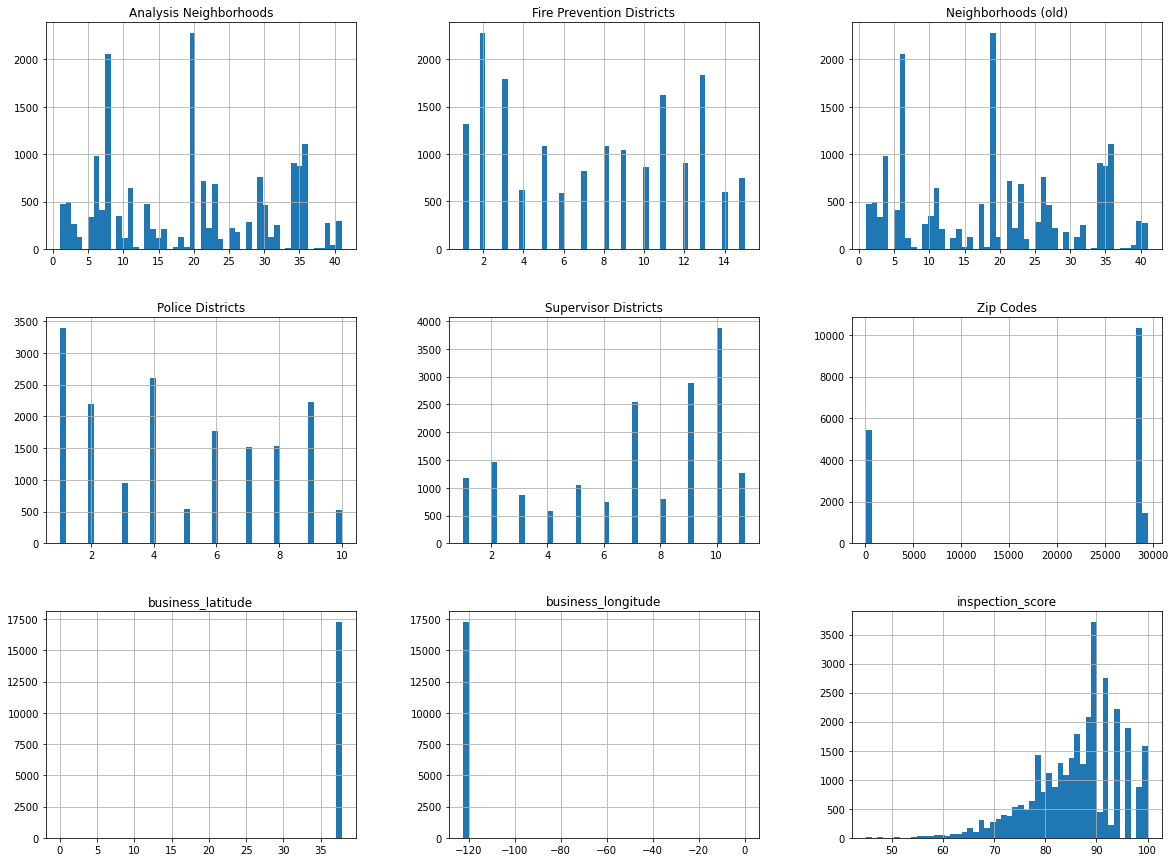

In [18]:
# Histogram
score_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

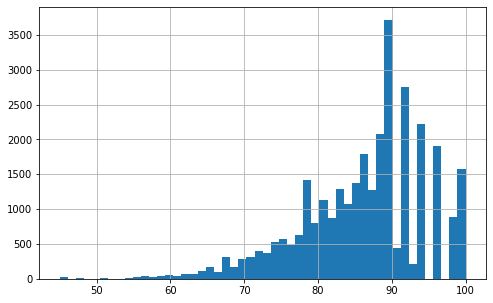

In [19]:
score_cleaned['inspection_score'].hist(bins=50, figsize=(8, 5))
plt.show()

Text(0, 0.5, 'business_latitude')

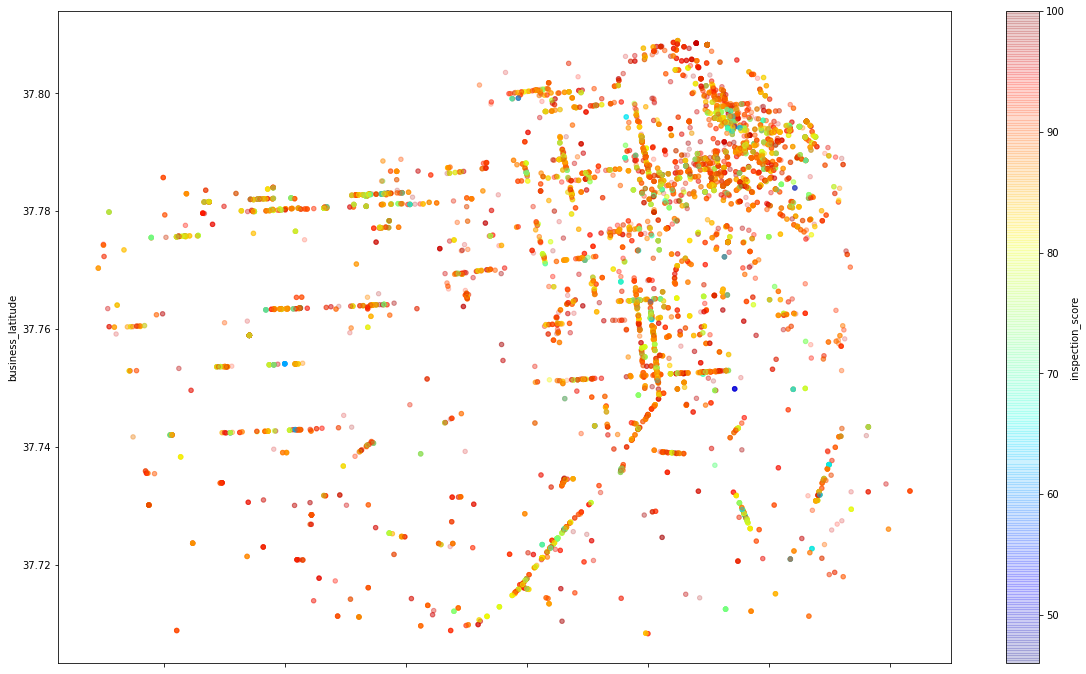

In [20]:
# Check the relationship between locations and scores. 
score_cleaned.dropna().plot(kind='scatter', x='business_longitude', y='business_latitude', alpha=0.2, 
                                                           c='inspection_score', cmap=plt.get_cmap('jet'), 
                                                           colorbar=True, figsize=(20, 12))
plt.xlabel('business_longitude')
plt.ylabel('business_latitude')

In [21]:
# Inspections of restaurants
scores_unknown = pd.read_csv('data/facility_scores_unknown.csv')
scores_unknown.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,NaN,NaN,NaN,1.415046e+10,...,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101082,Tony's Pizza North 200,1 Warriors Way Level 300 North,San Francisco,CA,94158,NaN,NaN,NaN,NaN,...,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
3,78070,Uno Dos Taco,595 Market St Suite 160,San Francisco,CA,94105,NaN,NaN,NaN,NaN,...,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95174,Ahipoki Bowl,1511 Sloat Blvd,San Francisco,CA,94132,NaN,NaN,NaN,NaN,...,Routine - Unscheduled,95174_20180417_103133,Foods not protected from contamination,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
scores_unknown.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'Neighborhoods (old)', 'Police Districts',
       'Supervisor Districts', 'Fire Prevention Districts', 'Zip Codes',
       'Analysis Neighborhoods'],
      dtype='object')

In [23]:
scores_unknown['inspection_score'].unique()

array([nan])

In [24]:
score_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31650 entries, 1 to 43198
Data columns (total 15 columns):
business_name                31650 non-null object
business_address             31650 non-null object
violation_description        30010 non-null object
risk_category                30010 non-null object
business_postal_code         30983 non-null object
business_latitude            17259 non-null float64
business_longitude           17259 non-null float64
inspection_type              31650 non-null object
inspection_score             31650 non-null float64
Neighborhoods (old)          17250 non-null float64
Police Districts             17250 non-null float64
Supervisor Districts         17250 non-null float64
Fire Prevention Districts    17220 non-null float64
Zip Codes                    17256 non-null float64
Analysis Neighborhoods       17250 non-null float64
dtypes: float64(9), object(6)
memory usage: 3.9+ MB


In [25]:
score_cleaned[score_cleaned['inspection_score'] >= 90]

,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_type,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
1,BREADBELLY,1408 Clement St,Inadequately cleaned or sanitized food contact...,Moderate Risk,94118,NaN,NaN,Routine - Unscheduled,96.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Tselogs,552 Jones St,Improper thawing methods,Moderate Risk,94102,NaN,NaN,Routine - Unscheduled,94.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Beloved Cafe,3338 24th St,Low risk vermin infestation,Low Risk,94110,NaN,NaN,Routine - Unscheduled,96.0,NaN,NaN,NaN,NaN,NaN,NaN
11,Kettle Corn Star,865 Market St,NaN,NaN,94103,NaN,NaN,Routine - Unscheduled,100.0,NaN,NaN,NaN,NaN,NaN,NaN
17,Burger King #6414,4780 Mission St,Improper or defective plumbing,Low Risk,94112,NaN,NaN,Routine - Unscheduled,90.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43179,Dabba,71 Stevenson St #100,Inadequately cleaned or sanitized food contact...,Moderate Risk,94105,NaN,NaN,Routine - Unscheduled,92.0,NaN,NaN,NaN,NaN,NaN,NaN
43181,Philz Coffee,300 Folsom St,Inadequately cleaned or sanitized food contact...,Moderate Risk,94105,NaN,NaN,Routine - Unscheduled,92.0,NaN,NaN,NaN,NaN,NaN,NaN
43186,I-Tea Kearny SF,253 Kearny St,Improper food storage,Low Risk,94108,NaN,NaN,Routine - Unscheduled,90.0,NaN,NaN,NaN,NaN,NaN,NaN
43190,Bancarella,350 Powell St,Moderate risk food holding temperature,Moderate Risk,94102,NaN,NaN,Routine - Unscheduled,94.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
risk_cat_nan = score_cleaned[score_cleaned['risk_category'].isnull()]

In [27]:
risk_cat_nan['inspection_score'].value_counts()

100.0    1569
98.0       18
90.0        6
94.0        5
92.0        4
86.0        4
75.0        3
96.0        3
93.0        2
89.0        2
87.0        2
71.0        2
88.0        2
82.0        2
81.0        2
80.0        2
78.0        2
85.0        2
70.0        1
79.0        1
77.0        1
84.0        1
73.0        1
74.0        1
72.0        1
91.0        1
Name: inspection_score, dtype: int64

In [28]:
risk_cat_nan.dropna(subset=['violation_description'])

,business_name,business_address,violation_description,risk_category,business_postal_code,business_latitude,business_longitude,inspection_type,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods


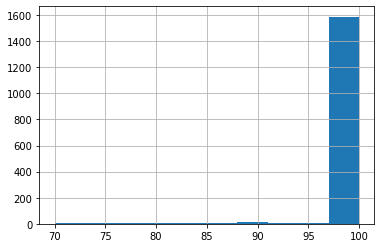

In [29]:
risk_cat_nan['inspection_score'].hist()

In [30]:
score_cleaned['inspection_type'].value_counts()

Routine - Unscheduled    31650
Name: inspection_type, dtype: int64

In [31]:
score_cleaned['Neighborhoods (old)'].value_counts()

19.0    2276
6.0     2055
36.0    1109
4.0      984
34.0     911
35.0     877
26.0     761
21.0     713
23.0     683
11.0     641
2.0      493
17.0     476
1.0      473
27.0     468
5.0      415
10.0     344
3.0      340
40.0     294
25.0     284
41.0     272
9.0      261
32.0     256
22.0     222
28.0     222
14.0     207
12.0     207
29.0     183
16.0     128
31.0     122
20.0     121
7.0      117
13.0     113
24.0     103
39.0      43
15.0      22
18.0      19
8.0       16
33.0       7
38.0       5
37.0       5
30.0       2
Name: Neighborhoods (old), dtype: int64

In [32]:
score_cleaned['Police Districts'].value_counts()

1.0     3396
4.0     2601
9.0     2219
2.0     2200
6.0     1776
8.0     1530
7.0     1520
3.0      945
5.0      533
10.0     530
Name: Police Districts, dtype: int64

In [33]:
score_cleaned['Supervisor Districts'].value_counts()

10.0    3880
9.0     2886
7.0     2543
2.0     1468
11.0    1272
1.0     1168
5.0     1056
3.0      862
8.0      790
6.0      741
4.0      584
Name: Supervisor Districts, dtype: int64

In [34]:
score_cleaned['Fire Prevention Districts'].value_counts()

2.0     2275
13.0    1837
3.0     1797
11.0    1627
1.0     1318
8.0     1089
5.0     1087
9.0     1045
12.0     909
10.0     864
7.0      820
15.0     746
4.0      618
14.0     603
6.0      585
Name: Fire Prevention Districts, dtype: int64

In [35]:
score_cleaned['Zip Codes'].value_counts()

28859.0    2376
28853.0    1263
28852.0    1226
28858.0    1168
308.0      1131
54.0        883
28861.0     804
28857.0     782
56.0        735
55.0        730
28855.0     686
29490.0     673
28856.0     633
28860.0     502
28862.0     484
57.0        478
29492.0     461
58.0        458
28854.0     418
29491.0     327
309.0       303
64.0        289
63.0        221
59.0        189
310.0        25
62.0          5
28589.0       4
28613.0       2
Name: Zip Codes, dtype: int64

In [36]:
score_cleaned['Analysis Neighborhoods'].value_counts()

20.0    2276
8.0     2055
36.0    1109
6.0      984
34.0     911
35.0     877
29.0     761
21.0     713
23.0     683
11.0     641
2.0      493
13.0     476
1.0      473
30.0     468
7.0      415
9.0      344
5.0      340
41.0     294
28.0     284
39.0     272
3.0      261
32.0     256
22.0     222
25.0     222
14.0     207
16.0     207
26.0     183
18.0     128
31.0     122
4.0      121
10.0     117
15.0     113
24.0     103
40.0      43
17.0      22
19.0      19
12.0      16
33.0       7
37.0       5
38.0       5
27.0       2
Name: Analysis Neighborhoods, dtype: int64

In [37]:
# Check business_name. 
# Normalize business name. 
score_cleaned['business_name'] = score_cleaned['business_name'].map(lambda x: str.lower(x))

In [38]:
score_95 = score_cleaned[score_cleaned['inspection_score'] >= 95]
score_85 = score_cleaned[(score_cleaned['inspection_score'] < 95) & (score_cleaned['inspection_score'] >= 85)]
score_u85 = score_cleaned[score_cleaned['inspection_score'] < 85]

In [39]:
pd.set_option('display.max_rows', None)
score_95['business_name']
# school, @<big organization>, starbucks, peet's, phil'z, at&t park, blue bottle

1                                               breadbelly
8                                             beloved cafe
11                                        kettle corn star
60                           peninsula catering and events
62                                        the olympic cafe
64                                  fairmont san francisco
85                                        eclectic cookery
86                                 eurest dining - verizon
102                                            bazaar cafe
109                                                 woops!
135                          afc sushi @ good life grocers
145                                             posh bagel
146                                    willie l. jr. brown
255                                         guerra's to go
264                                                  pollo
267                                          orson's belly
275                                        olea restaura

In [40]:
score_95['business_name'].value_counts()

peet's coffee & tea                                                      38
starbucks coffee                                                         34
starbucks                                                                32
the organic coup                                                         19
bluestar refreshment services @ uber technologies, inc                   15
starbucks coffee co                                                      13
ghirardelli chocolate                                                    13
proper food                                                              13
mcdonald's                                                               12
bon appetit @ twitter                                                    11
jw marriott sf union square                                              11
phil'z coffee                                                            10
at&t park - cream, inc.                                                  10
chipotle mex

In [41]:
score_85['business_name']

2                                   hakkasan san francisco
4                                                  tselogs
7                                  the estate kitchen, llc
17                                       burger king #6414
26                             hillcrest elementary school
30                                               pescatore
47                                     first korean market
65                                  taqueria el castillito
66                                                  chalos
68                                                    vixi
73                                           bobo's lounge
75                                      massawa restaurant
76                                       cafe guatemalteco
87                                           bobo's lounge
93                                  eclectic cookery, inc.
108                                            lush gelato
117                                            proper fo

In [42]:
score_85['business_name'].value_counts()

peet's coffee & tea                                                      64
jamba juice                                                              42
mcdonald's                                                               37
starbucks                                                                31
quickly                                                                  28
mixt greens/mixt                                                         28
la boulangerie de san francisco                                          27
specialty's cafe & bakery                                                26
starbucks coffee                                                         24
buckhorn grill                                                           22
rosamunde sausage grill                                                  19
pasquales                                                                18
henry's hunan restaurant                                                 18
lee's deli  

In [43]:
score_u85['business_name']

21                                      kabob trolley, llc
29                                          revelry bistro
53                                      kabob trolley, llc
78                                          buckhorn grill
81                                           cafe mystique
84                                       zazang restaurant
94                                   rock japanese cuisine
126                                            ping & yang
132                                           carbon grill
143                             bruno's pizza & restaurant
150                                       arang restaurant
155                                            agricole ii
156                                          spice kitchen
160                                          village house
169                                          dong bei mama
191                                                   zzan
197                                             an chi i

In [44]:
score_u85['business_name'].value_counts()

lee's deli                                                37
pakwan restaurant                                         31
las isletas                                               28
oasis grill                                               27
ithai                                                     25
lahore karahi                                             24
r & g executive lounge, inc                               24
hunan chef                                                24
tip top market                                            24
blue fin sushi & lounge                                   23
henry's hunan restaurant                                  23
spices restaurant                                         23
golden coast restaurant                                   23
golden city inn                                           23
clement bbq restaurant                                    22
belly burger                                              22
menkee wonton           